In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [29]:
# Importing the libraries
import matplotlib.pyplot as plt
import datetime

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/PROA/Assignment/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

##Explore Dataset

In [32]:
# Show first 5 rows in the dataset
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
# Show info the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [34]:
# Show statistic descriptive 
dataset.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


#Visualize

Text(0.5, 1.0, 'Open Price')

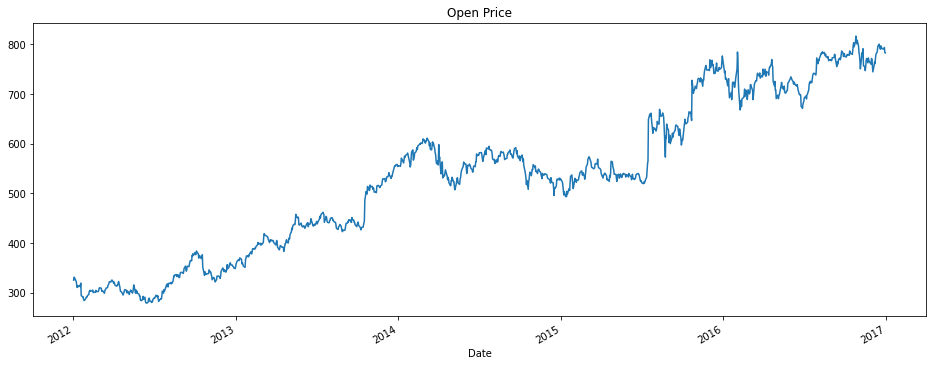

In [35]:
# Visualization data Open to Linechart 
dataset['Open'].plot(figsize=(16,6))
plt.title("Open Price")

In [36]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [37]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


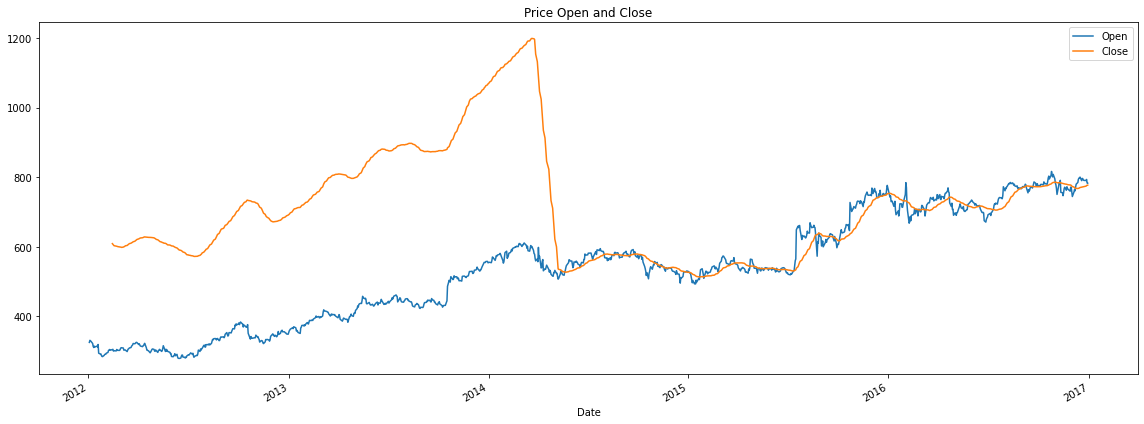

In [38]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()
plt.title("Price Open and Close")
plt.legend()
plt.tight_layout()

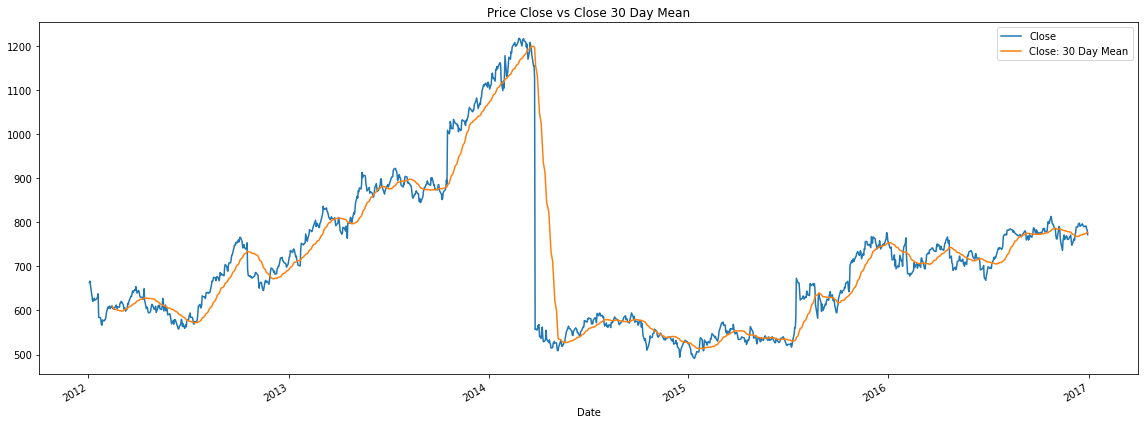

In [39]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title("Price Close vs Close 30 Day Mean")
plt.tight_layout()

Text(0.5, 1.0, 'Price Close minimum number of periods')

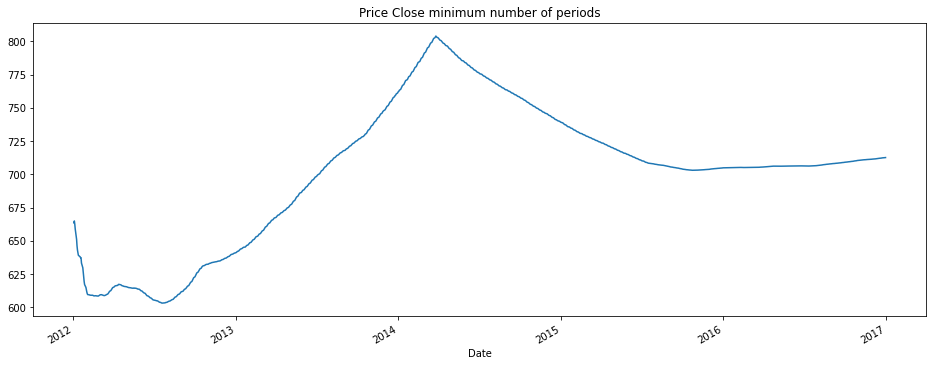

In [40]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.title("Price Close minimum number of periods")

In [41]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [42]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [43]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [44]:
#Building the RNN
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [45]:
# Initialising the RNN
model = Sequential()

In [46]:
X_train.shape, y_train.shape

((1198, 60, 1), (1198,))

In [47]:
from os import name
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2, name='Dropout-1'))
model.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3, name='Dropout-2'))
model.add(LSTM(units = 16, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4, name='Dropout-3'))
model.add(LSTM(units = 8, activation = 'relu'))
model.add(Dropout(0.5, name='Dropout-4'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 32)            4352      
                                                                 
 Dropout-1 (Dropout)         (None, 60, 32)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 32)            8320      
                                                                 
 Dropout-2 (Dropout)         (None, 60, 32)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 16)            3136      
                                                                 
 Dropout-3 (Dropout)         (None, 60, 16)            0         
                                                                 
 lstm_8 (LSTM)               (None, 8)                

In [48]:
# Compiling the RNN
# Code here
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [49]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch)

Epoch 1/100
38/38 [==============================] - 8s 90ms/step - loss: 0.2405
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.1226
Epoch 3/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0812
Epoch 4/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0597
Epoch 5/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0588
Epoch 6/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0478
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0479
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0475
Epoch 9/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0430
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0471
Epoch 11/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0406
Epoch 12/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0363
Epoch 13/100
38/38 [=====

In [51]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/PROA/Assignment/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [52]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [53]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [54]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [55]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [56]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


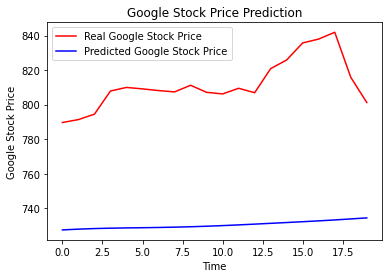

In [58]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
